# Single Cell RNA Seq data

## Conlsusion
-  The expression level of CIT2 changed significently (p-value=0.13). Therefore, the analysis implies that the stress turns on the retrograde response.
- BMH has highes expression level among the RTG genes, which locates in $10^{3}$
- RTG1 has the lowese expression level. Our RTG model needs further verification becuase we assume the expression level of RTG1 is much larger than others.

## Reference
- Single-cell RNA sequencing reveals intrinsic and extrinsic regulatory heterogeneity in yeast responding to stress. [[link](https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.2004050)]
- D3E : Discrete distributional differential expression (D3E) - a tool for gene expression analysis of single-cell RNA-seq data. [[link](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-016-0944-6)]

## Plotting Single Cell RNA Data

### Method
- Original data is separated into "Stressed" and "Unstressed"
- Applied D3E tool to Seq data

### Conclusion
- Dropout event inferences the correlation analysis
- Reqiure Single cell analysis tool
    - D3E 
    - [Summary of SC-Seq tool until 2018](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-019-2599-6/tables/1)

In [1]:
import os
os.listdir("data/")

['GSE102475_GASCH_NaCl-scRNAseq_NormData.txt',
 'GSE102475_RTG-Expression-Table_zeroRemoved.csv',
 'd3e_SC_seq_resp_GSE102475.csv',
 'SingleCellRNAseq_yeast_GSE102475_LabelSep.out',
 'SingleCellRNAseq_yeast_GSE102475_LabelSep.txt',
 'd3e_SC_resp_RtgGenes_GSE102475.csv',
 'Single Cell RNAseq_yeast_GSE102475.xlsx']

In [2]:
# Access original xlsx file
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Alias of gene names
alias = {
    "RTG1": "YOL067C",
    "RTG2": "YGL252C",
    "RTG3": "YBL103C",
    "BMH1": "YER177W",
    "MKS1": "YNL076W",
    "CIT2": "YCR005C"
}

# Read original Single-cell seq data
data = "data/SingleCellRNAseq_yeast_GSE102475_LabelSep.txt"
df = pd.read_table(data)

dft = df.set_index("GeneID")
dft = dft.transpose()
dft = dft.filter(items= list(alias.values()))
dft.columns = list(alias.keys())

label = []
conds = ["Stressed", "Unstressed"] # Two conditions 
for i in dft.index.values:
    for cond in conds:
        if cond in i:
            label.append(cond)
dft["condition"] = label


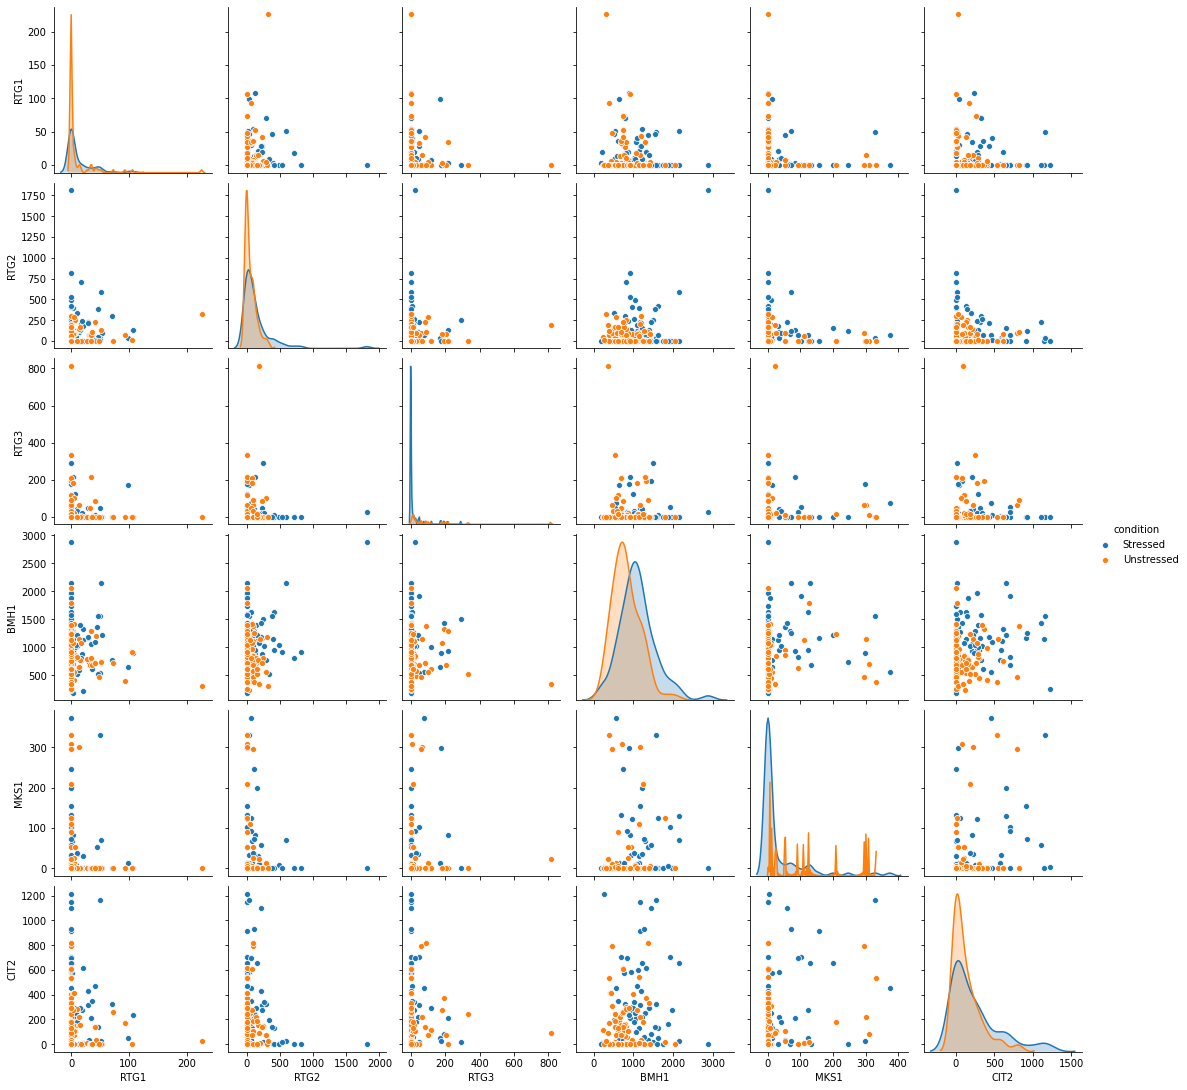

In [3]:
sns.pairplot(dft, hue="condition", kind="scatter" )

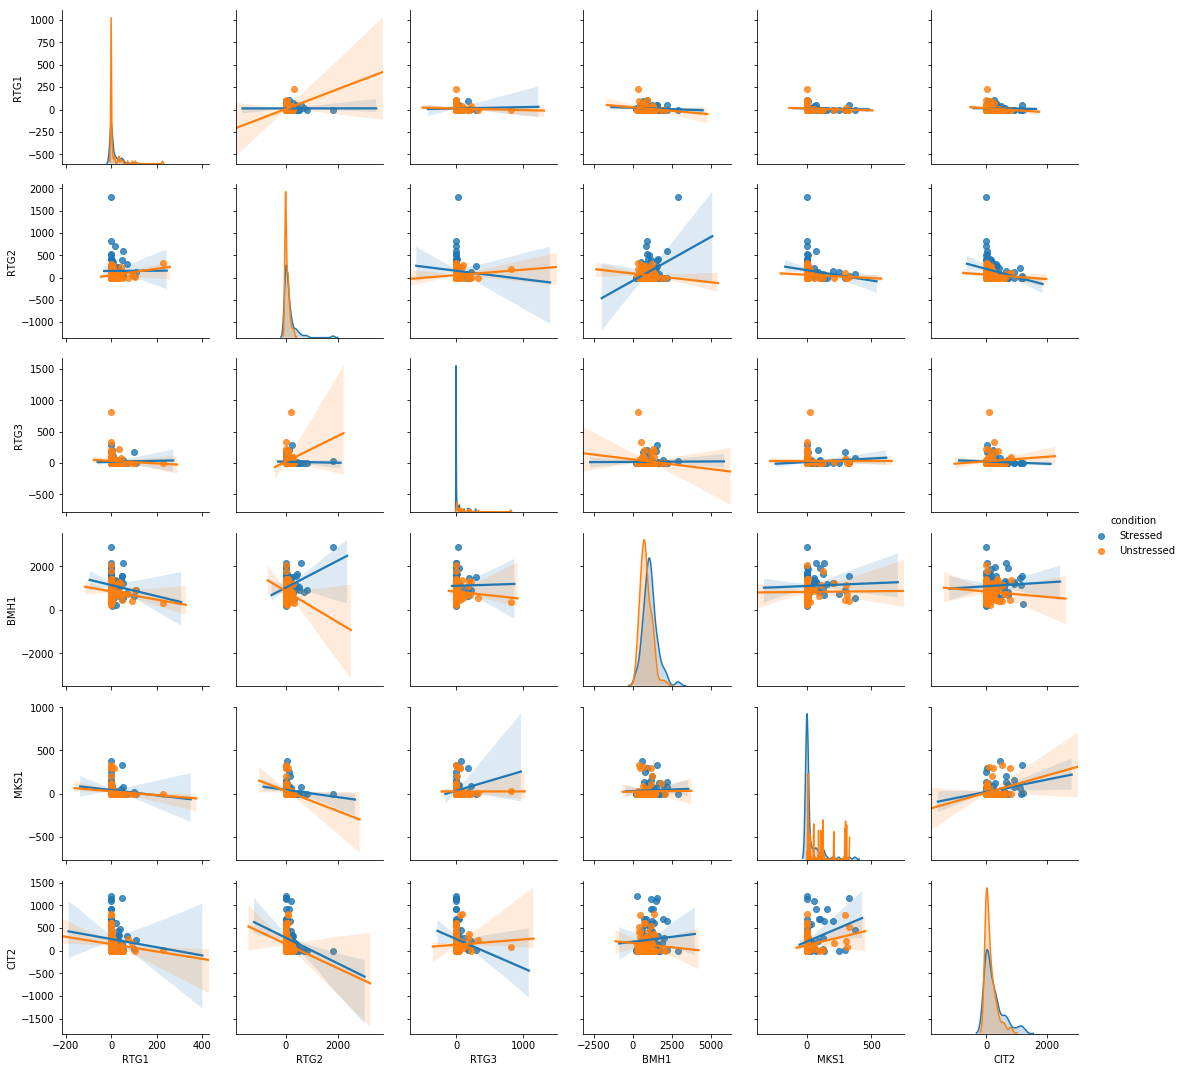

In [5]:
sns_plot = sns.pairplot(dft, hue="condition", kind="reg")
sns_plot.savefig("img/rna_pairPlot.pdf")

In [4]:
# Show dropout events
dft.drop( ["condition"], axis=1)

,RTG1,RTG2,RTG3,BMH1,MKS1,CIT2
Stressed,0.00,0.00,0.00,1157.23,0.00,1146.01
Stressed.1,29.13,227.58,46.42,1160.11,0.00,320.14
Stressed.2,3.54,109.65,0.00,1297.91,0.00,253.01
Stressed.3,0.00,0.00,50.76,1920.72,103.34,702.95
Stressed.4,0.00,252.09,289.61,1506.30,0.00,14.89
...,...,...,...,...,...,...
Unstressed.78,0.00,0.00,13.68,608.32,5.72,134.01
Unstressed.79,0.00,0.00,12.77,1239.51,208.16,178.88
Unstressed.80,0.00,0.00,0.00,1789.29,125.03,20.15
Unstressed.81,0.00,163.95,15.25,620.78,0.00,0.00


# D3E: Single-cell seq data analysis

<img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1186%2Fs12859-016-0944-6/MediaObjects/12859_2016_944_Fig1_HTML.gif?as=webp">

*Transcriptional bursting model*

Sequencing data is analysed by D3E tool ([github](https://github.com/hemberg-lab/D3E))

[The results](data/SingelCellRNAseq_yeast_GSE102475_LabelSep.out) are derived by the following bash command:

```sh
python D3ECmd.py SingelCellRNAseq_yeast_GSE102475_LabelSep.txt  SingelCellRNAseq_yeast_GSE102475_LabelSep.out  Stressed Unstressed -m 1 -t 0 -z 0 -n 1 -v 
```

In [5]:
# Read analysis
import pandas as pd
d3e = pd.read_table("data/SingleCellRNAseq_yeast_GSE102475_LabelSep.out")
d3e = d3e.set_index("#GeneID")
d3eT = d3e.transpose()
# Display
f = d3eT.filter( list(alias.values()), axis=1)
f.columns = list(alias.keys())
f

,RTG1,RTG2,RTG3,BMH1,MKS1,CIT2
a1,0.2861,0.2847,0.2108,2.9294,0.2084,0.2666
b1,2.4216,7.4406,2.4531,221.391,1.8381,1.8472
g1,174.16,6324.66,388.007,123817,523.577,2593.84
GOF1,0.0129,0.071,8.32e-05,0.266,2.14e-05,0.164
a2,0.2361,0.2493,0.1865,3.2938,0.182,0.2708
b2,4.4817,1.6106,4.7217,77.0496,2.2689,1.7023
g2,429.698,585.684,1752.71,30239.7,561.631,1392.69
GOF2,6.01e-06,0.0409,8.06e-06,0.394,6.54e-05,0.199
s1,76.1111,892.978,168.281,577.834,302.731,1467.03
f1,0.2548,0.2737,0.1934,2.8902,0.1862,0.2319


In [6]:
# Save results
d3e.to_csv("data/d3e_SC_seq_resp.csv")
f.to_csv("data/d3e_SC_resp_RtgGenes.csv")

### Mean and Std are not simply the calculation of read-count table

In [7]:
"""
Show that the mean value and std of d3e result are not simply the mean and std of read-count table
"""
import numpy as np

# Set a gene
GeneName = "RTG3"

# Retrieve data
s = df[df["GeneID"] == alias[GeneName]].transpose()
d = s.to_dict()
key = list(d.keys())[0]
val = list(d[key].values())
del val[0]
val = np.array(val)


# Cal mean and cv
mean = np.mean(val[val!=0.0])
cv = np.std(val[val!=0.0])

# Print
print("TABLE CALCULATION")
print("MEAN: {}(Table)/\t {}(mu1)/\t {}(mu2)".format(mean, f[GeneName]["mu1"], f[GeneName]["mu2"]))
print("STD: {}(Table)/\t {}(cv1)/\t {}(cv2)".format(cv,f[GeneName]["cv1"],f[GeneName]["cv2"]))

TABLE CALCULATION
MEAN: 84.98176470588237(Table)/	 25.7976(mu1)/	 50.7607(mu2)
STD: 131.1681609308595(Table)/	 2.6313(cv1)/	 3.6720(cv2)


# Plotting D3E results

In [8]:
import pandas as pd
d3e = pd.read_csv("data/d3e_SC_resp_RtgGenes.csv", index_col=0)
d3e

,RTG1,RTG2,RTG3,BMH1,MKS1,CIT2
a1,0.286100,0.28470,2.108000e-01,2.929400e+00,2.084000e-01,2.666000e-01
b1,2.421600,7.44060,2.453100e+00,2.213906e+02,1.838100e+00,1.847200e+00
g1,174.159800,6324.66210,3.880073e+02,1.238171e+05,5.235774e+02,2.593836e+03
GOF1,0.012900,0.07100,8.320000e-05,2.660000e-01,2.140000e-05,1.640000e-01
a2,0.236100,0.24930,1.865000e-01,3.293800e+00,1.820000e-01,2.708000e-01
b2,4.481700,1.61060,4.721700e+00,7.704960e+01,2.268900e+00,1.702300e+00
g2,429.697700,585.68440,1.752710e+03,3.023966e+04,5.616311e+02,1.392693e+03
GOF2,0.000006,0.04090,8.060000e-06,3.940000e-01,6.540000e-05,1.990000e-01
s1,76.111100,892.97760,1.682808e+02,5.778343e+02,3.027306e+02,1.467025e+03
f1,0.254800,0.27370,1.934000e-01,2.890200e+00,1.862000e-01,2.319000e-01


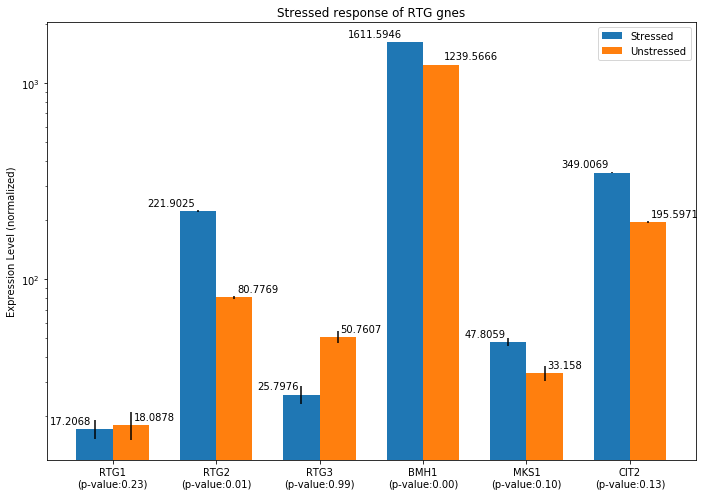

In [184]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# DATA
st_means, st_std = d3e[d3e.index == "mu1"].values, d3e[d3e.index == "cv1"].values
ust_means, ust_std = d3e[d3e.index == "mu2"].values, d3e[d3e.index == "cv2"].values

pvalues = d3e[d3e.index == "p-value"].values
name_of_genes = list(d3e.keys())

# SETTING
st_means, st_std, ust_means, ust_std, pvalues = st_means.flatten(), st_std.flatten(), ust_means.flatten(), ust_std.flatten(), pvalues.flatten()

ind = np.arange(len(st_means))  # the x locations for the groups
width = 0.35  # the width of the bars

## Add p value
name_p = [ name + "\n(p-value:{0:.2f})".format(p) for name, p in zip(name_of_genes, pvalues )]
name_of_genes = name_p

# PLOTTING
fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(ind - width/2, st_means, width, yerr=st_std,
                label='Stressed')
rects2 = ax.bar(ind + width/2, ust_means, width, yerr=ust_std,
                label='Unstressed')

## Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Expression Level (normalized)')
ax.set_title('Stressed response of RTG gnes')
ax.set_xticks(ind)
ax.set_xticklabels( name_of_genes)
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom', color="black")


autolabel(rects1, "left")
autolabel(rects2, "right")





fig.tight_layout()
plt.yscale("log")
plt.show()

fig.savefig("img/stressed_response_mean.pdf")
fig.savefig("img/stressed_response_mean.png", dpi=100)